In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications import DenseNet121
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn import preprocessing

In [2]:
SIZE=224

In [3]:
train_images, train_labels = [], []
for directory_path in glob.glob("Training/*"):
    tr_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        train_images.append(img)
        train_labels.append(tr_label)

In [ ]:
# train_labels

In [4]:
test_images, test_labels = [], []
for directory_path in glob.glob("Testing/*"):
    ts_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        test_images.append(img)
        test_labels.append(ts_label)

In [ ]:
# test_labels

In [5]:
# Convert images and labels to numpy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8406, 224, 224, 3), (8406,), (2104, 224, 224, 3), (2104,))

In [9]:
# Before one-hot encoding
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

# After one-hot encoding
unique_labels_train_encoded = np.unique(y_train_encoded)
unique_labels_test_encoded = np.unique(y_test_encoded)

print("Unique labels in y_train:", unique_labels_train)
print("Unique labels in y_test:", unique_labels_test)
print("Unique labels in y_train_encoded:", unique_labels_train_encoded)
print("Unique labels in y_test_encoded:", unique_labels_test_encoded)

Unique labels in y_train: ['class0' 'class1' 'class2' 'class3' 'class4']
Unique labels in y_test: ['class0' 'class1' 'class2' 'class3' 'class4']
Unique labels in y_train_encoded: [0 1 2 3 4]
Unique labels in y_test_encoded: [0 1 2 3 4]


In [11]:
# Encode labels from text to integers
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode y values for the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)

In [13]:
x_train.shape, y_train_one_hot.shape, x_test.shape, y_test_one_hot.shape

((8406, 224, 224, 3), (8406, 5), (2104, 224, 224, 3), (2104, 5))

In [14]:
base_model = DenseNet121(input_shape=(SIZE, SIZE, 3), include_top=False, weights="imagenet")

In [15]:
from tensorflow.keras import layers 
import tensorflow as tf
for layer in base_model.layers:
    layer.trainable = False

In [16]:
base_model.trainable=False
classifier=Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))

In [17]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model
history = classifier.fit(x_train, y_train_one_hot, epochs=50, batch_size=32)

Epoch 1/50
263/263 [==============================] - 390s 1s/step - loss: 20.1281 - accuracy: 0.8884
Epoch 2/50
263/263 [==============================] - 396s 2s/step - loss: 2.5243 - accuracy: 0.9578
Epoch 3/50
263/263 [==============================] - 414s 2s/step - loss: 3.5616 - accuracy: 0.9544
Epoch 4/50
263/263 [==============================] - 398s 2s/step - loss: 2.1566 - accuracy: 0.9698
Epoch 5/50
263/263 [==============================] - 395s 2s/step - loss: 1.2249 - accuracy: 0.9806
Epoch 6/50
263/263 [==============================] - 389s 1s/step - loss: 2.5878 - accuracy: 0.9724
Epoch 7/50
263/263 [==============================] - 374s 1s/step - loss: 1.2802 - accuracy: 0.9843
Epoch 8/50
263/263 [==============================] - 373s 1s/step - loss: 1.7898 - accuracy: 0.9795
Epoch 9/50
263/263 [==============================] - 373s 1s/step - loss: 2.3503 - accuracy: 0.9799
Epoch 10/50
263/263 [==============================] - 377s 1s/step - loss: 1.7196 - accur

In [31]:
prediction_NN = classifier.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = label_encoder.inverse_transform(prediction_NN)

66/66 [==============================] - 137s 2s/step


In [32]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)

[[1186    3    0    0    0]
 [   0  154    0    2    0]
 [   0    0  156    0    0]
 [   1    9    0  117    0]
 [   0    0    0    0  476]]


In [33]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.9928707224334601


In [34]:
# Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# print(class_labels)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
print(confusion_matrix(test_labels, prediction_NN))
print(classification_report(test_labels, prediction_NN, target_names=target_names,digits=3))

[[1186    3    0    0    0]
 [   0  154    0    2    0]
 [   0    0  156    0    0]
 [   1    9    0  117    0]
 [   0    0    0    0  476]]
              precision    recall  f1-score   support

     Class 0      0.999     0.997     0.998      1189
     Class 1      0.928     0.987     0.957       156
     Class 2      1.000     1.000     1.000       156
     Class 3      0.983     0.921     0.951       127
     Class 4      1.000     1.000     1.000       476

    accuracy                          0.993      2104
   macro avg      0.982     0.981     0.981      2104
weighted avg      0.993     0.993     0.993      2104



In [35]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

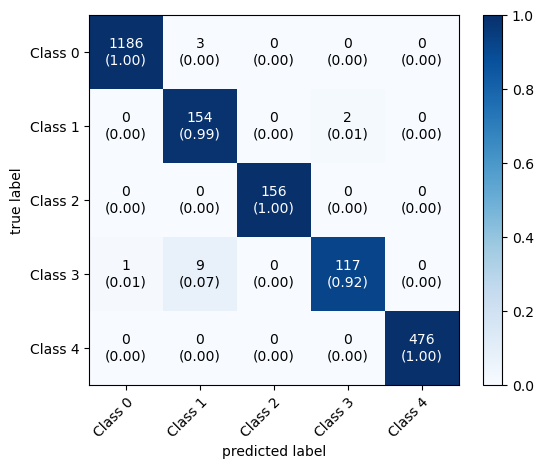

In [36]:
class_dict = {0: 'Class 0',
              1: 'Class 1',
              2: 'Class 2',
              3: 'Class 3',
              4: 'Class 4'}

multiclass = np.array([[1186,    3,    0,    0,    0],
                       [0,  154,    0,    2,    0],
                       [0,    0,  156,    0,    0],
                       [1,    9,    0,  117,    0],
                       [0,    0,    0,    0,  476]])

fig, ax = plot_confusion_matrix(
    conf_mat=multiclass,
    class_names=class_dict.values(),show_normed=True,colorbar=True)